# Visualization WDI dataset

In [16]:
# Import packages
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


## Load data

Import the country dataset to get the codes of the countries in the WDI dataset in order to differentiate from groups of countries, e.g. Europe

In [17]:
df_countrydata = pd.read_csv('WDICountry.csv', sep=',') 

# filter to keep only actual countries in dataset
df_countrydata = df_countrydata[df_countrydata['Income Group'].notna()]
country_codes = df_countrydata['Country Code'].unique()


Import the WDI dataset

In [18]:
df = pd.read_csv('WDIData.csv', sep=',') 
df = df.drop('Unnamed: 66', axis=1)

# filter to keep only actual countries in dataset
df = df[df['Country Code'].isin(country_codes)]

# filter to keep only relevant variables in dataset
selected_indicators = ['GDP growth (annual %)',
                       'Individuals using the Internet (% of population)',
                       'Foreign direct investment, net inflows (BoP, current US$)',
                       'GNI per capita, PPP (current international $)']
df = df[df['Indicator Name'].isin(selected_indicators)]

df.head(2)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
71113,Afghanistan,AFG,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.682366e+07,4.831135e+07,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.340455e+07,1.297015e+07,NaN
71128,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.275229e+01,5.600745e+00,2.724543e+00,1.451315e+00,2.260314e+00,2.647003e+00,1.189228e+00,3.911603e+00,-2.351101e+00,NaN


For effective data analysis we need the data in the wide format but with the variable names in the columns

In [19]:
df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                  var_name='Year', value_name='Value')

df_wide = df_long.pivot_table(index=['Year', 'Country Name', 'Country Code'], 
                              columns='Indicator Name', values='Value', aggfunc='first')

df_wide = df_wide.reset_index()
df_wide['Year'] = df_wide['Year'].astype(int)
df_wide

Indicator Name,Year,Country Name,Country Code,"Foreign direct investment, net inflows (BoP, current US$)",GDP growth (annual %),"GNI per capita, PPP (current international $)",Individuals using the Internet (% of population)
0,1960,Botswana,BWA,NaN,NaN,NaN,0.0
1,1960,Burundi,BDI,NaN,NaN,NaN,0.0
2,1960,Grenada,GRD,NaN,NaN,NaN,0.0
3,1960,Maldives,MDV,NaN,NaN,NaN,0.0
4,1960,Syrian Arab Republic,SYR,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
10756,2021,West Bank and Gaza,PSE,NaN,7.050451,7370.0,NaN
10757,2021,"Yemen, Rep.",YEM,NaN,-2.061513,NaN,NaN
10758,2021,Serbia,SRB,NaN,7.389271,20610.0,NaN
10759,2021,Montenegro,MNE,NaN,12.434359,23280.0,NaN


Check NA values

<Axes: xlabel='Indicator Name'>

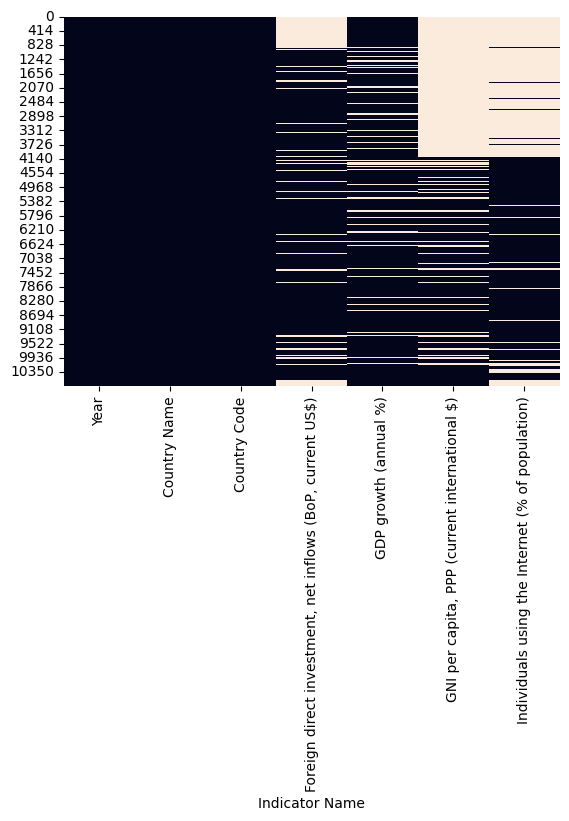

In [20]:
sns.heatmap(df_wide.isnull(), cbar=False)

## Plot data

Testing plot

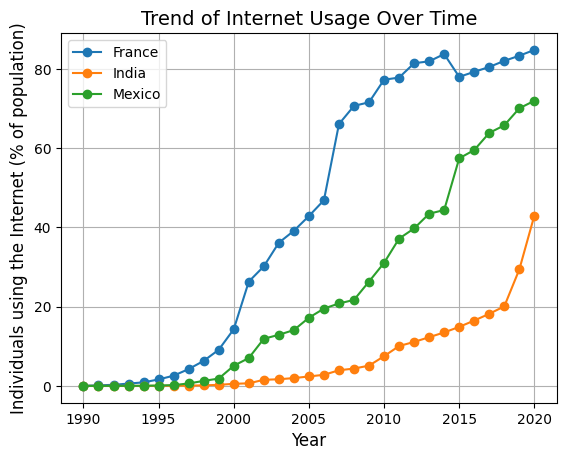

In [21]:
df = df_wide
country_groups = ["France",
                  "India",
                  "Mexico"]

df_groups = df[df['Country Name'].isin(country_groups)]

for group in country_groups:
    group_data = df_groups[df_groups['Country Name'] == group]
    plt.plot(group_data['Year'], group_data['Individuals using the Internet (% of population)'], marker='o', linestyle='-', label=group)

plt.title('Trend of Internet Usage Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Individuals using the Internet (% of population)', fontsize=12)
# locs, labels = plt.xticks() 
# plt.xticks(locs[::5], df_groups['Year'].unique()[::5])
plt.legend()
plt.grid(True)
plt.show()


There is a strong relation between GNI and internet usage

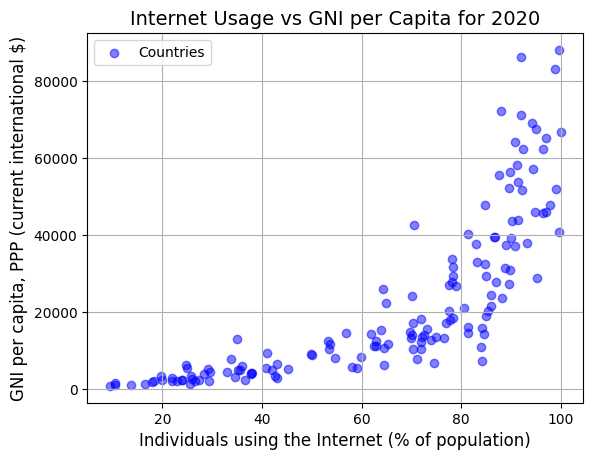

In [22]:
df_2020 = df_wide[df_wide['Year'] == 2020]

plt.scatter(df_2020['Individuals using the Internet (% of population)'], 
            df_2020['GNI per capita, PPP (current international $)'],
            alpha=0.5,
            color='blue')
plt.title('Internet Usage vs GNI per Capita for 2020', fontsize=14)
plt.xlabel('Individuals using the Internet (% of population)', fontsize=12)
plt.ylabel('GNI per capita, PPP (current international $)', fontsize=12)
plt.legend(['Countries'], loc='upper left')
plt.grid(True)
plt.show()


In [23]:
df_animate = df_wide

country_groups = ["Australia", "Belgium", "Canada", "Denmark", "Ecuador", 
                 "Fiji", "Greece", "Hungary", "Ireland", "Japan", 
                 "Kazakhstan", "Luxembourg", "Nepal", "Oman", "Peru", 
                 "Qatar", "Russia", "Singapore", "Turkey", "Uruguay", 
                 "Venezuela", "Wales", "Yemen", "Zimbabwe"]
df_animate = df_animate[df_animate['Country Name'].isin(country_groups)]

df_animate = df_animate[['Year',
                         'Country Name',
                         'Individuals using the Internet (% of population)',
                         'GNI per capita, PPP (current international $)']]

start_year = 1990
end_year = 2020
df_animate = df_animate[(df_animate['Year'] >= start_year) & (df_animate['Year'] <= end_year)]

df_animate = df_animate.dropna(axis=0)

fig = px.scatter(df_animate, x='Individuals using the Internet (% of population)', 
                 y='GNI per capita, PPP (current international $)',
                 animation_frame="Year",
                 animation_group="Country Name",
                 size='GNI per capita, PPP (current international $)',
                 color="Country Name",
                 title="Internet Access vs GNI per Country",
                 hover_name="Country Name",
                 range_y=[df_animate['GNI per capita, PPP (current international $)'].min(),df_animate['GNI per capita, PPP (current international $)'].max()]) 

fig.update_xaxes(range=[0, 100])

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, {"frame": {"duration": 500, "redraw": True}}],
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}],
                ),
            ],
        )
    ]
)
fig.show()


In [24]:
df_map = df_wide

df_map = df_map[['Year',
        'Country Name',
        'Individuals using the Internet (% of population)']]

start_year = 1990
end_year = 2020
df_map = df_map[(df_map['Year'] >= start_year) & (df_map['Year'] <= end_year)]

df = df_map
fig = go.Figure()

# Sort years in ascending order
years = sorted(df['Year'].unique())

# Add traces for each year
for year in years:
    df_year = df[df['Year'] == year]
    fig.add_trace(go.Choropleth(
        locations=df_year['Country Name'],
        z=df_year['Individuals using the Internet (% of population)'],
        text=df_year['Country Name'],
        locationmode='country names',
        visible=(year == 2020), 
        zmin=0,
        zmax=100,
        colorscale=[  
            [0, 'red'],  
            [1, 'green'],
        ],
        colorbar_title='Individuals using the Internet (% of population)',
        name=str(year)
    ))

steps = []
for i in range(len(fig.data)):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(fig.data)],
        label=fig.data[i]['name']
    )
    step['args'][1][i] = True
    steps.append(step)

# Find the index of year 2020
active_index = years.index(2020)

sliders = [dict(
    active=active_index,  
    currentvalue={"prefix": "Year: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title='World Map of Internet Users Over Time',
    geo=dict(showframe=False, showcoastlines=False, scope='world')
)

fig.show()

